In [1]:
import numpy as np # creating and manipulating arrays
import matplotlib.pyplot as plt # visualizing data
import sklearn # regression models
import statsmodels.api as sm 
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

# simple linear regression model using Statmodels

In [2]:
# Import data

df = pd.read_csv("/Users/gnanenderreddy/Downloads/garments_worker_productivity.csv")
df = df.fillna(0)

df

,date,quarter,department,day,team,targeted productivity,smv,wip,over time,incentive,idle time,idle men,no of style change,no of workers,actual productivity
0,1/1/15,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/15,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/15,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/15,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/15,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/15,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/15,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/15,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/15,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [3]:
df.head()

,date,quarter,department,day,team,targeted productivity,smv,wip,over time,incentive,idle time,idle men,no of style change,no of workers,actual productivity
0,1/1/15,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/15,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/15,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/15,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/15,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.describe()

,team,targeted productivity,smv,wip,over time,incentive,idle time,idle men,no of style change,no of workers,actual productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,687.228070,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1514.582341,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [5]:
# Encoding --> convert categorical into quantitative

df['date'] = df['date'].astype('category')
df['date'] = df['date'].cat.codes

df['quarter'] = df['quarter'].astype('category')
df['quarter'] = df['quarter'].cat.codes

df['department'] = df['department'].astype('category')
df['department'] = df['department'].cat.codes

df['day'] = df['day'].astype('category')
df['day'] = df['day'].cat.codes

df = df.replace(np.nan,0)

from scipy import stats
z = np.abs(stats.zscore(df))
df1 = df[(z<3).all(axis=1)]
df1.shape

(1091, 15)

In [6]:
df.head()

,date,quarter,department,day,team,targeted productivity,smv,wip,over time,incentive,idle time,idle men,no of style change,no of workers,actual productivity
0,0,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,0,1,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [7]:
y = df1['actual productivity']
X = df1.drop('actual productivity', axis =1)

X

,date,quarter,department,day,team,targeted productivity,smv,wip,over time,incentive,idle time,idle men,no of style change,no of workers
0,0,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,0,0,1,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0
2,0,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,0,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,0,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51,1,0,5,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0
1193,51,1,0,5,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0
1194,51,1,0,5,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0
1195,51,1,0,5,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0


In [8]:
#X = sm.add_constant(X)
model = sm.OLS(endog= y, exog= X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     actual productivity   R-squared (uncentered):                   0.966
Model:                             OLS   Adj. R-squared (uncentered):              0.966
Method:                  Least Squares   F-statistic:                              2383.
Date:                 Tue, 13 Sep 2022   Prob (F-statistic):                        0.00
Time:                         18:58:56   Log-Likelihood:                          595.96
No. Observations:                 1091   AIC:                                     -1166.
Df Residuals:                     1078   BIC:                                     -1101.
Df Model:                           13                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [9]:

y = df1['actual productivity']
X = df1[['team','smv','incentive','targeted productivity']]

X

,team,smv,incentive,targeted productivity
0,8,26.16,98,0.80
1,1,3.94,0,0.75
2,11,11.41,50,0.80
3,12,11.41,50,0.80
4,6,25.90,50,0.80
...,...,...,...,...
1192,10,2.90,0,0.75
1193,8,3.90,0,0.70
1194,7,3.90,0,0.65
1195,9,2.90,0,0.75


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 1)

In [11]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#y_pred = pd.DataFrame(y_pred, columns = ['Predictions'])

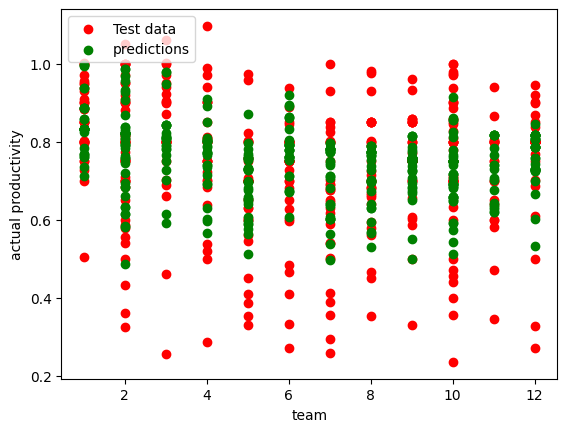

In [12]:
plt.scatter(X_test['team'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['team'], y_pred, color = "green", label = "predictions")
plt.xlabel("team")
plt.ylabel("actual productivity")
plt.legend(loc="upper left")
plt.show()

In [13]:
val_error = mean_squared_error(y_test, y_pred)

y_train_pred = reg.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)

# Get validation scores
scores = cross_validate(reg, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = reg.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.020279157719181352
Validation MSE:  0.26185207408370853
R-squared: 0.37665976796292566


# polynomial regression model with stochastic gradient descent

In [14]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .45, random_state = 1)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_val_poly = poly_features.fit_transform(X_val)


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0 = 0.01, random_state=7)
sgd_reg.fit(X_train_poly, y_train.ravel())
poly_train_pred = sgd_reg.predict(X_train_poly)
poly_test_pred = sgd_reg.predict(X_test_poly)
poly_val_pred = sgd_reg.predict(X_val_poly)

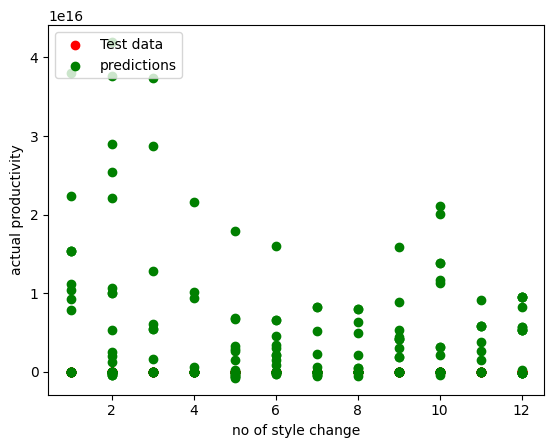

In [15]:
plt.scatter(X_test['team'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['team'], poly_test_pred, color = "green", label = "predictions")
plt.xlabel("no of style change")
plt.ylabel("actual productivity")
plt.legend(loc="upper left")
plt.show()

In [16]:
val_error = mean_squared_error(y_val, poly_val_pred)
train_error = mean_squared_error(y_train, poly_train_pred)

print("Training MSE: ", train_error)
print("Validation MSE: ", val_error)

score = sgd_reg.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  6.692378156888989e+31
Validation MSE:  7.810850112053094e+31
R-squared: -2.334838747209768e+33


# Ridge regression

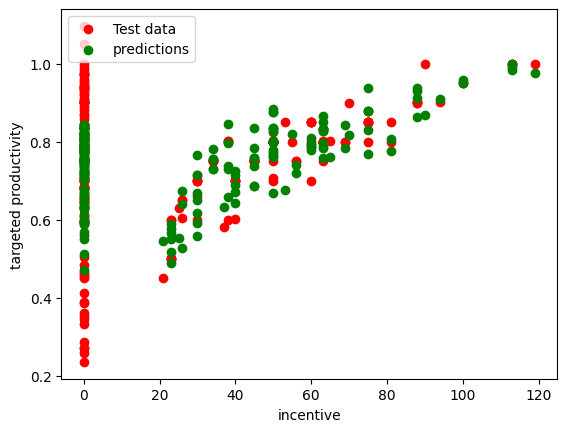

In [17]:
ridge = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l2", max_iter=1000, tol=1e-3, random_state=1))
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

plt.scatter(X_test['incentive'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['incentive'], y_pred, color = "green", label = "predictions")
plt.xlabel("incentive")
plt.ylabel("targeted productivity")
plt.legend(loc="upper left")
plt.show()

In [18]:
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)
ridge_val_pred = ridge.predict(X_val)

val_error = mean_squared_error(y_val, ridge_val_pred)
train_error = mean_squared_error(y_train, ridge_train_pred)

# Get validation scores
scores = cross_validate(ridge, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = ridge.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.020446702799058653
Validation MSE:  0.22668371698183265
R-squared: 0.3126973751122426


# Lasso Regression

In [19]:
lasso = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l1", max_iter=1000, tol=1e-3, random_state=42))
lasso.fit(X_train, y_train)
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)
lasso_val_pred = lasso.predict(X_val)

val_error = mean_squared_error(y_val, lasso_val_pred)
train_error = mean_squared_error(y_train, lasso_train_pred)

# Get validation scores
scores = cross_validate(lasso, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = lasso.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.02069826121505939
Validation MSE:  0.25761356057154156
R-squared: 0.3185769039334887


In [20]:
# Early Stopping

elasticnet = make_pipeline(StandardScaler(), SGDRegressor(early_stopping = True, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=42))
elasticnet.fit(X_train, y_train)
elasticnet_train_pred = elasticnet.predict(X_train)
elasticnet_test_pred = elasticnet.predict(X_test)
elasticnet_val_pred = elasticnet.predict(X_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

# Get validation scores
scores = cross_validate(elasticnet, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.020262203405765296
Validation MSE:  0.2672807200613796
R-squared: 0.32291348679328247


# Elastic Net

In [21]:
elasticnet = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=42))
elasticnet.fit(X_train, y_train)
elasticnet_train_pred = elasticnet.predict(X_train)
elasticnet_test_pred = elasticnet.predict(X_test)
elasticnet_val_pred = elasticnet.predict(X_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

# Get validation scores
scores = cross_validate(elasticnet, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.020699967439855957
Validation MSE:  0.25765742707650635
R-squared: 0.31836080747834905


In [22]:
SGD = SGDRegressor(penalty="elasticnet")

parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(estimator = SGD, param_grid = parameters, cv = 2, n_jobs=-1)

clf.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SGDRegressor(penalty='elasticnet'), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive']})

In [23]:
# Early Stopping
elasticnet = make_pipeline(StandardScaler(), SGDRegressor(early_stopping = True, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=42))
elasticnet.fit(X_train, y_train)
elasticnet_train_pred = elasticnet.predict(X_train)
elasticnet_test_pred = elasticnet.predict(X_test)
elasticnet_val_pred = elasticnet.predict(X_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

# Get validation scores
scores = cross_validate(elasticnet, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.020262203405765296
Validation MSE:  0.2672807200613796
R-squared: 0.32291348679328247


/Users/gnanenderreddy/opt/anaconda3/envs/busa597/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/Users/gnanenderreddy/opt/anaconda3/envs/busa597/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/Users/gnanenderreddy/opt/anaconda3/envs/busa597/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/Users/gnanenderreddy/opt/anaconda3/envs/busa597/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: Fut